# 🧹 Preprocessing - Analyse et Nettoyage des Données

Ce notebook analyse les données anonymisées de l'étape 1 et prépare les données pour l'entraînement des modèles IA.

## Objectifs
- 📊 Analyser la distribution des labels
- 🧹 Nettoyer les textes (ponctuation, normalisation)
- 📝 Préparer les données pour TF-IDF et BERT
- 💾 Sauvegarder les données préprocessées

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("📦 Imports terminés !")

📦 Imports terminés !


## 1. 📁 Chargement des Données Anonymisées

In [2]:
# Chemins des données anonymisées
train_path = "../../etape1-anonymisation/data/anonymized/train_anonymized.csv"
test_path = "../../etape1-anonymisation/data/anonymized/test_anonymized.csv"

# Chargement
print("📊 Chargement des données anonymisées...")
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(f"✅ Train: {train_df.shape[0]:,} lignes, {train_df.shape[1]} colonnes")
print(f"✅ Test: {test_df.shape[0]:,} lignes, {test_df.shape[1]} colonnes")

# Affichage des colonnes
print(f"\n📋 Colonnes train: {list(train_df.columns)}")
print(f"📋 Colonnes test: {list(test_df.columns)}")

📊 Chargement des données anonymisées...
✅ Train: 20,000 lignes, 17 colonnes
✅ Test: 20,000 lignes, 11 colonnes

📋 Colonnes train: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'username', 'email', 'ip_address', 'country', 'date_posted', 'phone_number', 'company', 'user_agent', 'device']
📋 Colonnes test: ['id', 'comment_text', 'username', 'email', 'ip_address', 'country', 'date_posted', 'phone_number', 'company', 'user_agent', 'device']
✅ Train: 20,000 lignes, 17 colonnes
✅ Test: 20,000 lignes, 11 colonnes

📋 Colonnes train: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'username', 'email', 'ip_address', 'country', 'date_posted', 'phone_number', 'company', 'user_agent', 'device']
📋 Colonnes test: ['id', 'comment_text', 'username', 'email', 'ip_address', 'country', 'date_posted', 'phone_number', 'company', 'user_agent', 'device']


In [3]:
# Aperçu des données
print("👀 Aperçu du dataset train:")
display(train_df.head())

print("\n👀 Aperçu du dataset test:")
display(test_df.head())

👀 Aperçu du dataset train:


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,username,email,ip_address,country,date_posted,phone_number,company,user_agent,device
0,0000997932d777bf,Explanation\nWhy the edits made under my username [PERSON] were reverted? They weren't vandalism...,0,0,0,0,0,0,6a9415eb,ffa1d726,3efa4f60,[MASKED],2025-10-05 16:42:14,ba0ab227,Krause Ltd,"Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7_2 rv:4.0; iw-IL) AppleWebKit/534.11.3 (KHTML, lik...",Android 4.4
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0,0,0,0,0,0,82547cd0,34621ace,9457700d,[MASKED],2025-07-28 16:34:28,62e317dd,"Gomez, Henderson and Dunn",Opera/9.86.(Windows 98; sw-KE) Presto/2.9.180 Version/10.00,Android 5.1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0,0,0,0,0,0,7a26a71b,9ca07f84,4e94a5ba,[MASKED],2025-03-22 17:07:21,b63ef340,Collier Inc,"Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_4 rv:3.0; shs-CA) AppleWebKit/532.31.5 (KHTML, like Ge...",Android 5.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics...",0,0,0,0,0,0,11a76095,17c1c713,2bf336d4,[MASKED],2025-03-11 08:05:52,bf7bafb4,Hall Ltd,Mozilla/5.0 (compatible; MSIE 8.0; Windows CE; Trident/3.1),Android 7.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,0aaec440,a066fa44,a2579f2a,[MASKED],2025-05-11 14:40:19,b15dcd95,Johnson LLC,"Mozilla/5.0 (iPad; CPU iPad OS 17_4 like Mac OS X) AppleWebKit/532.0 (KHTML, like Gecko) CriOS/3...",Android 4.1.2



👀 Aperçu du dataset test:


,id,comment_text,username,email,ip_address,country,date_posted,phone_number,company,user_agent,device
0,00001cee341fdb12,[PERSON] bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sa...,e8eca1db,e5a02aec,a6ca9286,[MASKED],2025-07-08 19:56:10,835133a6,"Erickson, Gonzalez and Davis","Mozilla/5.0 (iPod; U; CPU iPhone OS 3_1 like Mac OS X; ff-SN) AppleWebKit/531.48.3 (KHTML, like ...",Android 1.5
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO.",4d24a3a0,14b8ef7f,7c1fb991,[MASKED],2025-09-29 21:13:43,48af2bc3,Taylor and Sons,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 10.0; Trident/3.0),Android 3.1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * [PERSON] on [LOCATION] — / """,22e07a5b,8a0b0193,b7eae6ef,[MASKED],2025-03-09 12:27:16,fc8e5b9d,"Mcintosh, Gilbert and Cox",Mozilla/5.0 (Windows CE; mg-MG; rv:1.9.2.20) Gecko/7443-07-18 14:48:23 Firefox/3.8,Android 8.1.0
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can on...",f914d724,f5c3625a,9d0fe83d,[MASKED],2025-06-15 03:44:23,c92c42c0,Oliver-Rodriguez,Opera/8.35.(X11; Linux i686; id-ID) Presto/2.9.183 Version/11.00,Android 6.0
4,00017695ad8997eb,I don't anonymously edit articles at all.,ff471537,38beaaf3,e0c52062,[MASKED],2025-02-03 15:07:55,0206eb12,"Nichols, Harris and Davidson",Mozilla/5.0 (compatible; MSIE 8.0; Windows CE; Trident/4.1),Android 2.3


## 2. 📊 Analyse Exploratoire des Labels

In [4]:
# Identifier les colonnes de labels
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
available_labels = [col for col in label_columns if col in train_df.columns]

print(f"🏷️ Labels disponibles: {available_labels}")

if available_labels:
    # Distribution des labels
    print("\n📊 Distribution des labels (train):")
    for label in available_labels:
        count_1 = train_df[label].sum()
        count_0 = len(train_df) - count_1
        pct_1 = (count_1 / len(train_df)) * 100
        print(f"  {label:15} | 1: {count_1:,} ({pct_1:.1f}%) | 0: {count_0:,} ({100-pct_1:.1f}%)")
else:
    print("⚠️ Aucune colonne de label trouvée")

🏷️ Labels disponibles: ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

📊 Distribution des labels (train):
  toxic           | 1: 1,947 (9.7%) | 0: 18,053 (90.3%)
  severe_toxic    | 1: 222 (1.1%) | 0: 19,778 (98.9%)
  obscene         | 1: 1,077 (5.4%) | 0: 18,923 (94.6%)
  threat          | 1: 67 (0.3%) | 0: 19,933 (99.7%)
  insult          | 1: 1,021 (5.1%) | 0: 18,979 (94.9%)
  identity_hate   | 1: 181 (0.9%) | 0: 19,819 (99.1%)


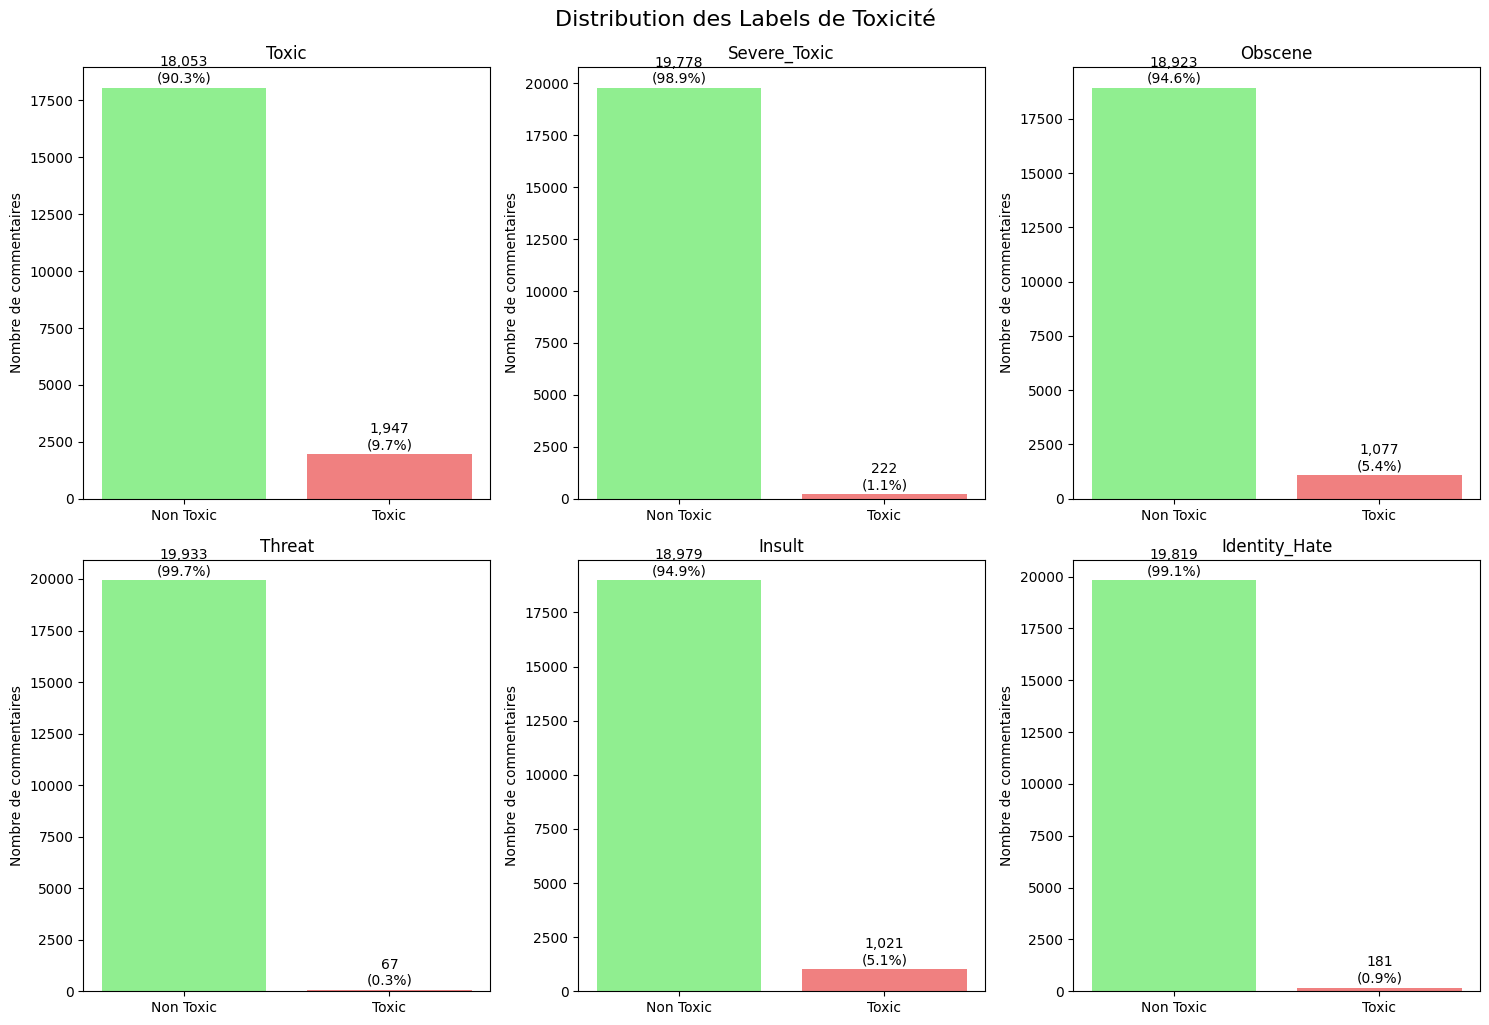

In [5]:
# Visualisation de la distribution des labels
if available_labels:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, label in enumerate(available_labels):
        if i < len(axes):
            counts = train_df[label].value_counts()
            axes[i].bar(['Non Toxic', 'Toxic'], counts, color=['lightgreen', 'lightcoral'])
            axes[i].set_title(f'{label.title()}')
            axes[i].set_ylabel('Nombre de commentaires')
            
            # Ajouter les pourcentages
            total = counts.sum()
            for j, v in enumerate(counts):
                axes[i].text(j, v + 100, f'{v:,}\n({v/total*100:.1f}%)', 
                           ha='center', va='bottom')
    
    # Masquer les axes vides
    for i in range(len(available_labels), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Distribution des Labels de Toxicité', y=1.02, fontsize=16)
    plt.show()

## 3. 📝 Analyse des Textes

In [6]:
# Statistiques sur les textes
print("📝 Statistiques des textes (comment_text):")

# Longueurs des textes
train_df['text_length'] = train_df['comment_text'].str.len()
train_df['word_count'] = train_df['comment_text'].str.split().str.len()

print(f"\n📏 Longueur des textes (caractères):")
print(f"  Moyenne: {train_df['text_length'].mean():.1f}")
print(f"  Médiane: {train_df['text_length'].median():.1f}")
print(f"  Min: {train_df['text_length'].min()}")
print(f"  Max: {train_df['text_length'].max()}")

print(f"\n🔤 Nombre de mots:")
print(f"  Moyenne: {train_df['word_count'].mean():.1f}")
print(f"  Médiane: {train_df['word_count'].median():.1f}")
print(f"  Min: {train_df['word_count'].min()}")
print(f"  Max: {train_df['word_count'].max()}")

📝 Statistiques des textes (comment_text):

📏 Longueur des textes (caractères):
  Moyenne: 399.3
  Médiane: 207.0
  Min: 8
  Max: 5463

🔤 Nombre de mots:
  Moyenne: 66.8
  Médiane: 35.0
  Min: 1
  Max: 1403

📏 Longueur des textes (caractères):
  Moyenne: 399.3
  Médiane: 207.0
  Min: 8
  Max: 5463

🔤 Nombre de mots:
  Moyenne: 66.8
  Médiane: 35.0
  Min: 1
  Max: 1403


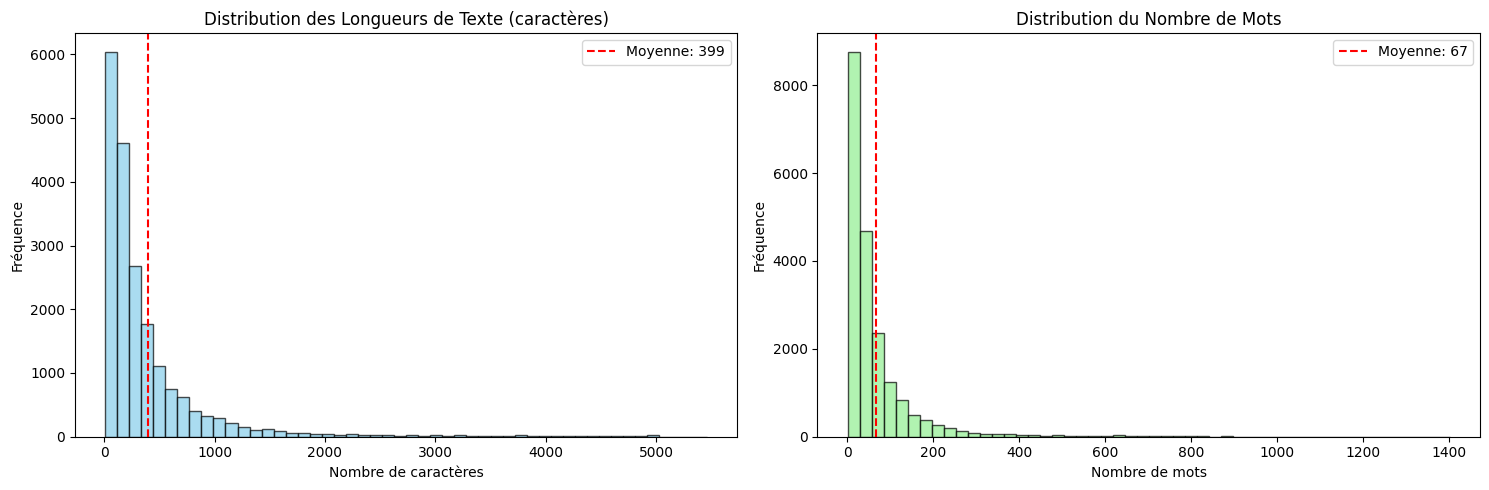

In [7]:
# Visualisation des distributions de longueur
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution des longueurs de caractères
axes[0].hist(train_df['text_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution des Longueurs de Texte (caractères)')
axes[0].set_xlabel('Nombre de caractères')
axes[0].set_ylabel('Fréquence')
axes[0].axvline(train_df['text_length'].mean(), color='red', linestyle='--', label=f'Moyenne: {train_df["text_length"].mean():.0f}')
axes[0].legend()

# Distribution des nombres de mots
axes[1].hist(train_df['word_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution du Nombre de Mots')
axes[1].set_xlabel('Nombre de mots')
axes[1].set_ylabel('Fréquence')
axes[1].axvline(train_df['word_count'].mean(), color='red', linestyle='--', label=f'Moyenne: {train_df["word_count"].mean():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

## 4. 🧹 Fonctions de Nettoyage de Texte

In [8]:
def clean_text(text):
    """
    Nettoie un texte pour le machine learning
    """
    if pd.isna(text) or text == "":
        return ""
    
    # Convertir en string
    text = str(text)
    
    # Minuscules
    text = text.lower()
    
    # Supprimer les URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Supprimer les mentions (@username)
    text = re.sub(r'@\w+', '', text)
    
    # Supprimer les hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)
    
    # Supprimer les caractères non alphabétiques (garder espaces)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Supprimer les espaces multiples
    text = re.sub(r'\s+', ' ', text)
    
    # Trim
    text = text.strip()
    
    return text

def clean_text_light(text):
    """
    Nettoyage léger pour BERT (garde plus d'information)
    """
    if pd.isna(text) or text == "":
        return ""
    
    text = str(text)
    
    # Supprimer les URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Supprimer les espaces multiples
    text = re.sub(r'\s+', ' ', text)
    
    # Trim
    text = text.strip()
    
    return text

# Test des fonctions
sample_text = "Hello @user! Check this URL: https://example.com #hashtag This is TOXIC!!! 123"
print(f"Texte original: {sample_text}")
print(f"Nettoyage complet: {clean_text(sample_text)}")
print(f"Nettoyage léger: {clean_text_light(sample_text)}")

Texte original: Hello @user! Check this URL: https://example.com #hashtag This is TOXIC!!! 123
Nettoyage complet: hello check this url this is toxic
Nettoyage léger: Hello @user! Check this URL: #hashtag This is TOXIC!!! 123


## 5. 🛠️ Préprocessing des Données

In [9]:
# Créer les versions nettoyées
print("🧹 Nettoyage des textes...")

# Pour modèle simple (TF-IDF)
train_df['comment_clean'] = train_df['comment_text'].apply(clean_text)
test_df['comment_clean'] = test_df['comment_text'].apply(clean_text)

# Pour BERT (nettoyage léger)
train_df['comment_bert'] = train_df['comment_text'].apply(clean_text_light)
test_df['comment_bert'] = test_df['comment_text'].apply(clean_text_light)

print("✅ Nettoyage terminé !")

# Vérification
print("\n👀 Exemples de nettoyage:")
for i in range(3):
    print(f"\nExemple {i+1}:")
    print(f"  Original: {train_df.iloc[i]['comment_text'][:100]}...")
    print(f"  Nettoyé:  {train_df.iloc[i]['comment_clean'][:100]}...")
    print(f"  BERT:     {train_df.iloc[i]['comment_bert'][:100]}...")

🧹 Nettoyage des textes...
✅ Nettoyage terminé !

👀 Exemples de nettoyage:

Exemple 1:
✅ Nettoyage terminé !

👀 Exemples de nettoyage:

Exemple 1:
  Original: Explanation
Why the edits made under my username [PERSON] were reverted? They weren't vandalisms, ju...
  Nettoyé:  explanation why the edits made under my username person were reverted they weren t vandalisms just c...
  BERT:     Explanation Why the edits made under my username [PERSON] were reverted? They weren't vandalisms, ju...

Exemple 2:
  Original: D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11...
  Nettoyé:  d aww he matches this background colour i m seemingly stuck with thanks talk january organization...
  BERT:     D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11,...

Exemple 3:
  Original: Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant ...
  Nettoyé:  hey man i

In [10]:
# Supprimer les textes vides après nettoyage
print("🔍 Vérification des textes vides...")

train_empty_clean = train_df['comment_clean'].str.strip() == ''
test_empty_clean = test_df['comment_clean'].str.strip() == ''

print(f"Train - Textes vides après nettoyage: {train_empty_clean.sum()}")
print(f"Test - Textes vides après nettoyage: {test_empty_clean.sum()}")

# Remplacer les textes vides par un placeholder
train_df.loc[train_empty_clean, 'comment_clean'] = 'empty text'
test_df.loc[test_empty_clean, 'comment_clean'] = 'empty text'
train_df.loc[train_empty_clean, 'comment_bert'] = 'empty text'
test_df.loc[test_empty_clean, 'comment_bert'] = 'empty text'

print("✅ Textes vides remplacés par 'empty text'")

🔍 Vérification des textes vides...
Train - Textes vides après nettoyage: 2
Test - Textes vides après nettoyage: 32
✅ Textes vides remplacés par 'empty text'


## 6. 🎯 Préparation des Labels

In [11]:
# Créer un label binaire "toxic" général (OR de tous les labels)
if available_labels:
    print("🎯 Création du label binaire 'is_toxic'...")
    
    # Pour train
    train_df['is_toxic'] = train_df[available_labels].max(axis=1)
    
    # Pour test (si les labels existent)
    test_available_labels = [col for col in available_labels if col in test_df.columns]
    if test_available_labels:
        test_df['is_toxic'] = test_df[test_available_labels].max(axis=1)
    else:
        print("⚠️ Pas de labels dans le dataset test")
    
    # Statistiques du label binaire
    toxic_count = train_df['is_toxic'].sum()
    total_count = len(train_df)
    toxic_pct = (toxic_count / total_count) * 100
    
    print(f"\n📊 Label binaire 'is_toxic':")
    print(f"  Toxic: {toxic_count:,} ({toxic_pct:.1f}%)")
    print(f"  Non-toxic: {total_count - toxic_count:,} ({100 - toxic_pct:.1f}%)")
    
else:
    print("⚠️ Aucun label disponible pour créer 'is_toxic'")

🎯 Création du label binaire 'is_toxic'...
⚠️ Pas de labels dans le dataset test

📊 Label binaire 'is_toxic':
  Toxic: 2,060 (10.3%)
  Non-toxic: 17,940 (89.7%)


## 7. 💾 Sauvegarde des Données Préprocessées

In [12]:
# Sauvegarder les datasets préprocessés
import os

# Créer le dossier data s'il n'existe pas
os.makedirs('../data', exist_ok=True)

# Sauvegarder
train_output = '../data/train_preprocessed.csv'
test_output = '../data/test_preprocessed.csv'

print("💾 Sauvegarde des données préprocessées...")
train_df.to_csv(train_output, index=False)
test_df.to_csv(test_output, index=False)

print(f"✅ Train sauvegardé: {train_output}")
print(f"✅ Test sauvegardé: {test_output}")

print(f"\n📊 Colonnes finales: {list(train_df.columns)}")
print(f"📊 Shape train: {train_df.shape}")
print(f"📊 Shape test: {test_df.shape}")

💾 Sauvegarde des données préprocessées...
✅ Train sauvegardé: ../data/train_preprocessed.csv
✅ Test sauvegardé: ../data/test_preprocessed.csv

📊 Colonnes finales: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'username', 'email', 'ip_address', 'country', 'date_posted', 'phone_number', 'company', 'user_agent', 'device', 'text_length', 'word_count', 'comment_clean', 'comment_bert', 'is_toxic']
📊 Shape train: (20000, 22)
📊 Shape test: (20000, 13)
✅ Train sauvegardé: ../data/train_preprocessed.csv
✅ Test sauvegardé: ../data/test_preprocessed.csv

📊 Colonnes finales: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'username', 'email', 'ip_address', 'country', 'date_posted', 'phone_number', 'company', 'user_agent', 'device', 'text_length', 'word_count', 'comment_clean', 'comment_bert', 'is_toxic']
📊 Shape train: (20000, 22)
📊 Shape test: (20000, 13)


## 8. 📋 Résumé du Preprocessing

### ✅ Étapes réalisées :
1. **Chargement** des données anonymisées (40k lignes total)
2. **Analyse** de la distribution des labels
3. **Nettoyage** des textes (2 versions : complète et légère)
4. **Création** du label binaire `is_toxic`
5. **Sauvegarde** des données préprocessées

### 🎯 Prochaines étapes :
1. **Modèle simple** : TF-IDF + Logistic Regression
2. **Modèle avancé** : BERT fine-tuning
3. **Comparaison** des performances

### 📁 Fichiers générés :
- `train_preprocessed.csv` : Données d'entraînement préprocessées
- `test_preprocessed.csv` : Données de test préprocessées